<a href="https://colab.research.google.com/github/Gabriel-br07/Pyspark_Recomend/blob/main/spark_recomend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
!pip install pyspark

In [84]:
from pyspark.sql import SparkSession

In [85]:
sessao_spark = SparkSession.builder\
                .appName("Recomendador PySpark")\
                .getOrCreate()
sessao_spark

In [86]:
from pyspark import SparkFiles

In [87]:
url_dados = 'https://github.com/IgorNascAlves/dados/blob/main/dados_musicas.csv?raw=true'
sessao_spark.sparkContext.addFile(url_dados)
path_dados_file = 'file://' + SparkFiles.get('dados_musicas.csv')

In [88]:
dados = sessao_spark.read.csv(path_dados_file,header = True, sep = ';',inferSchema = True)

In [89]:
dados.show()

+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|           valence|year|acousticness|       artists|      danceability|duration_ms|            energy|explicit|                  id|    instrumentalness|key|liveness|           loudness|mode|                name|popularity|speechiness|             tempo|        artists_song|
+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|             0.285|2000|     0.00239|      Coldplay|             0.429|     266773|0.6609999999999999|       0|3AJwUDP919kvQ9Qco...|             1.21E-4| 11|   0.234|  

In [90]:
dados.printSchema()

root
 |-- valence: double (nullable = true)
 |-- year: integer (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- artists: string (nullable = true)
 |-- danceability: double (nullable = true)
 |-- duration_ms: integer (nullable = true)
 |-- energy: double (nullable = true)
 |-- explicit: integer (nullable = true)
 |-- id: string (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- key: integer (nullable = true)
 |-- liveness: double (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- popularity: integer (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- artists_song: string (nullable = true)



In [91]:
dados.count()

20311

In [92]:
len(dados.columns)

19

In [93]:
import pyspark.sql.functions as f

In [94]:
dados.select()

DataFrame[]

In [95]:
dados.select([f.count(f.when(f.isnull(c),1)).alias(c) for c in dados.columns]).show()

+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+
|valence|year|acousticness|artists|danceability|duration_ms|energy|explicit| id|instrumentalness|key|liveness|loudness|mode|name|popularity|speechiness|tempo|artists_song|
+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+
|      0|   0|           0|      0|           0|          0|     0|       0|  0|               0|  0|       0|       0|   0|   0|         0|          0|    0|           0|
+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+



In [96]:
dados.show()

+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|           valence|year|acousticness|       artists|      danceability|duration_ms|            energy|explicit|                  id|    instrumentalness|key|liveness|           loudness|mode|                name|popularity|speechiness|             tempo|        artists_song|
+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|             0.285|2000|     0.00239|      Coldplay|             0.429|     266773|0.6609999999999999|       0|3AJwUDP919kvQ9Qco...|             1.21E-4| 11|   0.234|  

In [97]:
print(sorted(dados.select('year').distinct().collect()))

[Row(year=2000), Row(year=2001), Row(year=2002), Row(year=2003), Row(year=2004), Row(year=2005), Row(year=2006), Row(year=2007), Row(year=2008), Row(year=2009), Row(year=2010), Row(year=2011), Row(year=2012), Row(year=2013), Row(year=2014), Row(year=2015), Row(year=2016), Row(year=2017), Row(year=2018), Row(year=2019), Row(year=2020)]


In [98]:
url_anos_dados = 'https://github.com/IgorNascAlves/dados/blob/main/dados_musicas_ano.csv?raw=true'
sessao_spark.sparkContext.addFile(url_anos_dados)
path_dados_file = 'file://' + SparkFiles.get('dados_musicas_ano.csv')
dados_anos = sessao_spark.read.csv(path_dados_file,header = True,inferSchema = True)

In [99]:
dados_anos.show()

+----+----+------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+---+
|mode|year|      acousticness|       danceability|       duration_ms|             energy|   instrumentalness|           liveness|           loudness|        speechiness|             tempo|            valence|         popularity|key|
+----+----+------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+---+
|   1|1921|0.8868960000000005| 0.4185973333333336|260537.16666666663|0.23181513333333334|0.34487805886666656|            0.20571| -17.04866666666665|           0.073662|101.53149333333329|0.37932666666666665| 0.6533333333333333|  2|
|   1|1922|0.9385915492957748| 0.4820422535211267|165469.74647887325

In [100]:
dados_anos = dados_anos.filter('year >= 2000')
dados_anos.show()

+----+----+-------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+---+
|mode|year|       acousticness|      danceability|       duration_ms|            energy|   instrumentalness|           liveness|           loudness|        speechiness|             tempo|           valence|        popularity|key|
+----+----+-------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+---+
|   1|2000|0.28932270051635994| 0.590918047034764| 242724.6426380368|0.6254128323108387|0.10116776879345596| 0.1976860429447853| -8.247765848670758|0.08920541922290394| 118.9993231083843|0.5594754601226991|  46.6840490797546|  7|
|   1|2001| 0.2868424748428934|0.5833178553615969|240307.79600997505|0.626985522

In [101]:
dados_anos.count()

21

In [102]:
len(dados.columns)

19

In [103]:
import plotly.express as px

In [104]:
fig = px.line(dados_anos.toPandas(), x = 'year',y = 'loudness',markers = True,title = 'Variação do loudness conforme os anos')
fig.show()

In [105]:
import plotly.graph_objects as go

fig = go.Figure()

temp = dados_anos.toPandas()

fig.add_trace(go.Scatter(x=temp['year'], y=temp['acousticness'], name='Acousticness'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['valence'],
                    name='Valence'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['danceability'],
                    name='Danceability'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['energy'],
                    name='Energy'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['instrumentalness'],
                    name='Instrumentalness'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['liveness'],
                    name='Liveness'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['speechiness'],
                    name='Speechiness'))

fig.show()


In [106]:
fig = px.imshow(dados_anos.drop('mode').toPandas().corr(),text_auto=True)
fig.show()

In [107]:
url_dados_generos = 'https://github.com/IgorNascAlves/dados/blob/main/dados_musicas_genero.csv?raw=true'

sessao_spark.sparkContext.addFile(url_dados_generos)
path_dados_file = "file://" + SparkFiles.get("dados_musicas_genero.csv")

dados_generos = sessao_spark.read.csv(path_dados_file,header = True, inferSchema= True)

In [108]:
dados_generos.show()

+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+
|mode|              genres|       acousticness|       danceability|       duration_ms|             energy|    instrumentalness|           liveness|           loudness|         speechiness|             tempo|            valence|        popularity|key|
+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+
|   1|21st century clas...| 0.9793333333333332|0.16288333333333335|160297.66666666663|0.07131666666666665|          0.60683367|             0.3616|-31.514333333333337| 0.04056666666666667|           75.3365|0.10378333333333334| 27.83333333333333| 

In [109]:
dados_generos.count()

2973

In [110]:
dados_generos.select('genres').distinct().count()

2973

In [111]:
len(dados.columns)

19

In [112]:
from pyspark.ml.feature import VectorAssembler

In [113]:
dados_generos.columns

['mode',
 'genres',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'popularity',
 'key']

In [114]:
x = dados_generos.columns
x.remove('genres')
x

['mode',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'popularity',
 'key']

In [115]:
dados_generos_vector = VectorAssembler(inputCols = x ,outputCol = 'features').transform(dados_generos).select(['features','genres'])

In [116]:
dados_generos_vector.show(truncate = False, n = 5)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------+
|features                                                                                                                                                                                                                   |genres                |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------+
|[1.0,0.9793333333333332,0.16288333333333335,160297.66666666663,0.07131666666666665,0.60683367,0.3616,-31.514333333333337,0.04056666666666667,75.3365,0.10378333333333334,27.83333333333333,6.0]                            |21st century classical|
|[1.0,0.49478,0.2993

In [117]:
from pyspark.ml.feature import StandardScaler

In [118]:
scaler = StandardScaler(inputCol='features', outputCol = 'scaled_features')
scaler_model = scaler.fit(dados_generos_vector)
dados_generos_scaler = scaler_model.transform(dados_generos_vector)

In [119]:
dados_generos_scaler.show()

+--------------------+--------------------+--------------------+
|            features|              genres|     scaled_features|
+--------------------+--------------------+--------------------+
|[1.0,0.9793333333...|21st century clas...|[2.68174831000279...|
|[1.0,0.49478,0.29...|               432hz|[2.68174831000279...|
|[1.0,0.762,0.7120...|               8-bit|[2.68174831000279...|
|[1.0,0.6514170195...|                  []|[2.68174831000279...|
|[1.0,0.6765573049...|          a cappella|[2.68174831000279...|
|[1.0,0.45921,0.51...|            abstract|[2.68174831000279...|
|[1.0,0.3421466666...|      abstract beats|[2.68174831000279...|
|[1.0,0.2438540633...|    abstract hip hop|[2.68174831000279...|
|[0.0,0.3229999999...|           accordeon|[0.0,1.0101313736...|
|[1.0,0.446125,0.6...|           accordion|[2.68174831000279...|
|[0.0,0.0679505384...|          acid house|[0.0,0.2125045534...|
|[1.0,0.2569145079...|           acid rock|[2.68174831000279...|
|[1.0,0.00683,0.66...|   

In [120]:
from pyspark.ml.feature import PCA

In [121]:
pca = PCA(k = 2,inputCol = 'features', outputCol = 'pca_features')
model_pca = pca.fit(dados_generos_scaler)
dados_generos_pca = model_pca.transform(dados_generos_scaler)

In [122]:
dados_generos_pca.select('pca_features').show(truncate = False)

+---------------------------------------+
|pca_features                           |
+---------------------------------------+
|[160297.66588168716,73.89959202221921] |
|[1048887.331604982,140.04720731807478] |
|[115176.99829010107,134.5511027061009] |
|[232880.88906629797,103.55519784321527]|
|[190628.53940309878,117.0314733659264] |
|[343196.4984168277,129.98824651566937] |
|[229936.19830456734,126.36131210459844]|
|[231849.2327442896,111.7645747827727]  |
|[163999.9986561774,109.80340450327014] |
|[167061.56133422442,102.79208802890736]|
|[297188.05218831165,131.03407560806437]|
|[259203.9128823985,121.15856821212382] |
|[221159.99808420494,144.26276563112341]|
|[185040.25866695584,87.70682431016265] |
|[204321.24966131474,105.11632427676655]|
|[235379.78189852566,127.09601688752909]|
|[192332.11691654613,122.62578328455623]|
|[195035.99834317254,128.87258991092583]|
|[198399.99853474373,108.08906444301957]|
|[302906.069723451,134.54683384456342]  |
+---------------------------------

In [123]:
from pyspark.ml import Pipeline

In [124]:
pca_pipeline = Pipeline(stages = [
    VectorAssembler(inputCols = x, outputCol= "features"),
    StandardScaler(inputCol = "features", outputCol = 'scaled_features'),
    PCA(k = 2,inputCol = 'scaled_features',outputCol = 'pca_features')

])

In [125]:
pca_model_pipeline = pca_pipeline.fit(dados_generos)

In [126]:
dados_generos_pca = pca_model_pipeline.transform(dados_generos)

In [127]:
dados_generos_pca.show()

+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+--------------------+--------------------+--------------------+
|mode|              genres|       acousticness|       danceability|       duration_ms|             energy|    instrumentalness|           liveness|           loudness|         speechiness|             tempo|            valence|        popularity|key|            features|     scaled_features|        pca_features|
+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+--------------------+--------------------+--------------------+
|   1|21st century clas...| 0.9793333333333332|0.162883333

In [128]:
dados_generos_pca.select('pca_features').show(truncate= False)

+------------------------------------------+
|pca_features                              |
+------------------------------------------+
|[-2.5070953668885663,-0.43816913737698293]|
|[0.596967905663348,-4.981612052751353]    |
|[4.158460276223559,0.83665250810799]      |
|[2.3873448785122156,0.4877989015663361]   |
|[2.650121837167907,0.575681976882043]     |
|[1.4965091203367622,-1.8644183183717828]  |
|[3.9235207721573224,-0.28518350023528705] |
|[4.611011109831113,0.6783790472312338]    |
|[2.8376900630842288,0.57129937165805]     |
|[2.706690139892782,1.2593788079708255]    |
|[4.698331383924286,-1.2765569680619455]   |
|[3.375987496679866,-0.7560741064307498]   |
|[5.608998877066019,-1.042731164439324]    |
|[-0.2954946352117699,0.2763864586236268]  |
|[2.572559106287041,1.3169815431109746]    |
|[3.400822802049343,-0.5073029625781936]   |
|[4.366720316263417,0.33648270597710517]   |
|[2.7254698167723985,-0.5058604987046403]  |
|[4.958112358381603,-1.2627579957290722]   |
|[3.693495

In [129]:
from pyspark.ml.clustering import KMeans

In [130]:
seed = 1224

In [131]:
kmeans = KMeans(featuresCol = 'pca_features',predictionCol='cluster_pca').setK(5).setSeed(seed)

In [132]:
model_kmeans = kmeans.fit(dados_generos_pca)

In [133]:
prediction_kmeans = model_kmeans.transform(dados_generos_pca)

In [134]:
prediction_kmeans.select('pca_features','cluster_pca').show(truncate = False)

+------------------------------------------+-----------+
|pca_features                              |cluster_pca|
+------------------------------------------+-----------+
|[-2.5070953668885663,-0.43816913737698293]|2          |
|[0.596967905663348,-4.981612052751353]    |2          |
|[4.158460276223559,0.83665250810799]      |4          |
|[2.3873448785122156,0.4877989015663361]   |0          |
|[2.650121837167907,0.575681976882043]     |0          |
|[1.4965091203367622,-1.8644183183717828]  |2          |
|[3.9235207721573224,-0.28518350023528705] |4          |
|[4.611011109831113,0.6783790472312338]    |1          |
|[2.8376900630842288,0.57129937165805]     |4          |
|[2.706690139892782,1.2593788079708255]    |0          |
|[4.698331383924286,-1.2765569680619455]   |3          |
|[3.375987496679866,-0.7560741064307498]   |4          |
|[5.608998877066019,-1.042731164439324]    |1          |
|[-0.2954946352117699,0.2763864586236268]  |2          |
|[2.572559106287041,1.316981543

In [135]:
from pyspark.ml.functions import vector_to_array

In [136]:
pca_features_xy = prediction_kmeans.withColumn('x', vector_to_array('pca_features')[0])\
                 .withColumn('y', vector_to_array('pca_features')[1])\
                 .select(['x','y','cluster_pca','genres'])

In [137]:
pca_features_xy.show()

+-------------------+--------------------+-----------+--------------------+
|                  x|                   y|cluster_pca|              genres|
+-------------------+--------------------+-----------+--------------------+
|-2.5070953668885663|-0.43816913737698293|          2|21st century clas...|
|  0.596967905663348|  -4.981612052751353|          2|               432hz|
|  4.158460276223559|    0.83665250810799|          4|               8-bit|
| 2.3873448785122156|  0.4877989015663361|          0|                  []|
|  2.650121837167907|   0.575681976882043|          0|          a cappella|
| 1.4965091203367622| -1.8644183183717828|          2|            abstract|
| 3.9235207721573224|-0.28518350023528705|          4|      abstract beats|
|  4.611011109831113|  0.6783790472312338|          1|    abstract hip hop|
| 2.8376900630842288|    0.57129937165805|          4|           accordeon|
|  2.706690139892782|  1.2593788079708255|          0|           accordion|
|  4.6983313

In [138]:
fig = px.scatter(pca_features_xy.toPandas(), x='x', y='y', color='cluster_pca', hover_data=['x', 'y', 'genres'])
fig.show()


In [139]:
pca_model_pipeline.stages[2].explainedVariance

DenseVector([0.2975, 0.1212])

In [140]:
dados.show()

+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|           valence|year|acousticness|       artists|      danceability|duration_ms|            energy|explicit|                  id|    instrumentalness|key|liveness|           loudness|mode|                name|popularity|speechiness|             tempo|        artists_song|
+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|             0.285|2000|     0.00239|      Coldplay|             0.429|     266773|0.6609999999999999|       0|3AJwUDP919kvQ9Qco...|             1.21E-4| 11|   0.234|  

In [141]:
x = dados.columns
x.remove('artists')
x.remove('id')
x.remove('name')
x.remove('artists_song')
x

['valence',
 'year',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'popularity',
 'speechiness',
 'tempo']

In [142]:
dados_encoded_vector = VectorAssembler(inputCols = x, outputCol = 'features').transform(dados)

In [143]:
dados_encoded_vector.select('features').show(truncate = False,n = 5)

+-------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                 |
+-------------------------------------------------------------------------------------------------------------------------+
|[0.285,2000.0,0.00239,0.429,266773.0,0.6609999999999999,0.0,1.21E-4,11.0,0.234,-7.227,1.0,84.0,0.0281,173.372]           |
|[0.613,2000.0,0.143,0.843,270507.0,0.8059999999999999,1.0,0.0,4.0,0.0771,-5.9460000000000015,0.0,80.0,0.269,94.948]      |
|[0.4,2000.0,0.00958,0.556,216880.0,0.8640000000000001,0.0,0.0,3.0,0.209,-5.87,0.0,84.0,0.0584,105.143]                   |
|[0.5429999999999999,2000.0,0.00664,0.545,233933.0,0.865,0.0,1.1E-5,11.0,0.168,-5.7079999999999975,0.0,78.0,0.0286,99.009]|
|[0.76,2000.0,0.0302,0.949,284200.0,0.6609999999999999,1.0,0.0,5.0,0.0454,-4.244,0.0,80.0,0.0572,104.504]                 |
+-------

In [144]:
scaler = StandardScaler(inputCol='features', outputCol= 'features_scaled')
model_scaler = scaler.fit(dados_encoded_vector)
dados_musica_scaler = model_scaler.transform(dados_encoded_vector)

In [145]:
dados_musica_scaler.select('features_scaled').show(truncate = False,n = 5)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features_scaled                                                                                                                                                                                                                                                               |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[1.156596679221045,329.8170613984441,0.008403188822334736,2.5040545743834373,3.7858811737298526,2.980511298201045,0.0,6.070790766862789E-4,3.0696424994844875,1.4832857988766257,-1.

In [146]:
k = len(x)
k

15

In [147]:
pca = PCA(k = k,inputCol = 'features_scaled',outputCol = 'pca_features')
model_pca = pca.fit(dados_musica_scaler)
dados_musica_pca = model_pca.transform(dados_musica_scaler)

In [148]:
sum(model_pca.explainedVariance) * 100

100.00000000000003

In [149]:
lista_valores = [sum(model_pca.explainedVariance[0:i+1]) for i in range(k)]
lista_valores


[0.21297354127107349,
 0.3459774162295507,
 0.43989805678254446,
 0.5267820578269103,
 0.6001038103117929,
 0.666571951365239,
 0.7282174213581728,
 0.7845103843321023,
 0.8350002357002614,
 0.8812446547406769,
 0.9151737562703048,
 0.9435370133056039,
 0.9699018569070161,
 0.9900947792885582,
 1.0000000000000002]

In [150]:
import numpy as np

In [151]:
k = sum(np.array(lista_valores) <= 0.7)
k

6

In [152]:
pca = PCA(k = k,inputCol = 'features_scaled',outputCol = 'pca_features')
model_pca = pca.fit(dados_musica_scaler)
dados_musica_pca = model_pca.transform(dados_musica_scaler)

In [153]:
dados_musica_pca.select('pca_features').show(truncate = False, n = 5)

+----------------------------------------------------------------------------------------------------------------------+
|pca_features                                                                                                          |
+----------------------------------------------------------------------------------------------------------------------+
|[-34.71004464775702,-165.3684878490617,-11.163498729833675,-139.1137428085442,14.152192300931317,-6.254422223810444]  |
|[-36.49885762774904,-167.85185045616547,-10.729023248907904,-135.90435265671286,13.38840189058717,-3.972980727830917] |
|[-35.46030091694054,-165.99633344577876,-11.361290348241944,-138.24276881246985,13.866654919305718,-4.342675920458773]|
|[-35.56301325520582,-165.59515096480598,-11.46022600703173,-137.52095740570027,15.568542803922659,-4.542073725584329] |
|[-36.54556974907565,-167.37512505802474,-11.881276527236897,-136.27798590243967,14.056847990344485,-3.583390145779214]|
+-------------------------------

In [154]:
pca_pipeline = Pipeline(stages = [
    VectorAssembler(inputCols = x, outputCol= 'features'),
    StandardScaler(inputCol = 'features', outputCol = 'scaled_features'),
    PCA(k = 6,inputCol = 'scaled_features',outputCol = 'pca_features')

])

In [155]:
model_pca_pipeline = pca_pipeline.fit(dados)

In [156]:
projection = model_pca_pipeline.transform(dados)

In [157]:
projection.select('pca_features').show(truncate = False,n = 5)

+----------------------------------------------------------------------------------------------------------------------+
|pca_features                                                                                                          |
+----------------------------------------------------------------------------------------------------------------------+
|[-34.71004464775702,-165.3684878490617,-11.163498729833675,-139.1137428085442,14.152192300931317,-6.254422223810444]  |
|[-36.49885762774904,-167.85185045616547,-10.729023248907904,-135.90435265671286,13.38840189058717,-3.972980727830917] |
|[-35.46030091694054,-165.99633344577876,-11.361290348241944,-138.24276881246985,13.866654919305718,-4.342675920458773]|
|[-35.56301325520582,-165.59515096480598,-11.46022600703173,-137.52095740570027,15.568542803922659,-4.542073725584329] |
|[-36.54556974907565,-167.37512505802474,-11.881276527236897,-136.27798590243967,14.056847990344485,-3.583390145779214]|
+-------------------------------

In [158]:
kmeans = KMeans(k = 50,featuresCol = 'pca_features',predictionCol = 'cluster_pca',seed = seed)

In [159]:
modelo_kmeans = kmeans.fit(projection)

In [160]:
projection_kmeans = modelo_kmeans.transform(projection)

In [161]:
projection_kmeans.select(['pca_features','cluster_pca']).show()

+--------------------+-----------+
|        pca_features|cluster_pca|
+--------------------+-----------+
|[-34.710044647757...|          8|
|[-36.498857627749...|          4|
|[-35.460300916940...|         35|
|[-35.563013255205...|         16|
|[-36.545569749075...|         34|
|[-36.713222290262...|         34|
|[-36.013246178822...|         34|
|[-36.542687712104...|         23|
|[-36.425249009784...|         16|
|[-35.872074915770...|         34|
|[-31.639065936568...|         44|
|[-35.661446890546...|         34|
|[-35.574542234850...|         32|
|[-36.022399748656...|         13|
|[-34.336941950985...|         35|
|[-35.096906055142...|         49|
|[-35.202423054032...|         38|
|[-34.942948671026...|         30|
|[-36.617404517517...|          4|
|[-34.296973387410...|          6|
+--------------------+-----------+
only showing top 20 rows



In [162]:
projection_kmeans = projection_kmeans.withColumn('x', vector_to_array('pca_features')[0])\
                 .withColumn('y', vector_to_array('pca_features')[1])

In [167]:
projection_kmeans.select(['x','y','cluster_pca','artists_song']).show(truncate = False)

+-------------------+-------------------+-----------+--------------------------------------------------------+
|x                  |y                  |cluster_pca|artists_song                                            |
+-------------------+-------------------+-----------+--------------------------------------------------------+
|-34.71004464775702 |-165.3684878490617 |8          |Coldplay - Yellow                                       |
|-36.49885762774904 |-167.85185045616547|4          |OutKast - Ms. Jackson                                   |
|-35.46030091694054 |-165.99633344577876|35         |Linkin Park - In the End                                |
|-35.56301325520582 |-165.59515096480598|16         |3 Doors Down - Kryptonite                               |
|-36.54556974907565 |-167.37512505802474|34         |Eminem - The Real Slim Shady                            |
|-36.7132222902623  |-166.482084830997  |34         |Disturbed - Down with the Sickness                      |
|

In [164]:
fig = px.scatter(projection_kmeans.toPandas(), x='x', y='y', color='cluster_pca', hover_data=['artists_song'])
fig.show()


In [171]:
nome_musica = 'Taylor Swift - Blank Space'

In [175]:
cluster = projection_kmeans.filter(projection_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]
cluster

3

In [182]:
musicas_recomendadas = projection_kmeans.filter(projection_kmeans.cluster_pca == cluster).select('artists_song','id','pca_features')

In [183]:
musicas_recomendadas.show()

+--------------------+--------------------+--------------------+
|        artists_song|                  id|        pca_features|
+--------------------+--------------------+--------------------+
|Usher - Yeah! (fe...|5rb9QrpfcKFHM1EUb...|[-36.050436933493...|
|Kelly Clarkson - ...|3xrn9i8zhNZsTtcoW...|[-35.191226411336...|
| Keyshia Cole - Love|0W4NhJhcqKCqEP2GI...|[-34.751332435196...|
|Mariah Carey - We...|3LmvfNUQtglbTryds...|[-35.144610288312...|
|Korn - Coming Undone|6p2liQLGoDaLXgND6...|[-35.272207170621...|
|Chris Brown - Yo ...|7DFnq8FYhHMCylykf...|[-35.112344117719...|
|  Aventura - Un Beso|1SaEt8dwTuLDzenUu...|[-34.134357732463...|
|Chris Brown - Say...|5F7IJrXD6Fa3EmqoY...|[-34.728839526520...|
|Red Hot Chili Pep...|10Nmj3JCNoMeBQ87u...|[-36.101793760083...|
|Craig Morgan - In...|0Ta3jOf8m9yCSWMVw...|[-35.227552248025...|
|Arctic Monkeys - ...|3geFzA6VBSNZUTmV3...|[-34.696049351615...|
|Arctic Monkeys - 505|58ge6dfP91o9oXMzq...|[-35.057671072817...|
|T-Pain - Buy U a ...|2aI

In [185]:
componentes_musica = musicas_recomendadas.filter(musicas_recomendadas.artists_song == nome_musica)\
                                         .select('pca_features').collect()[0][0]
componentes_musica

DenseVector([-35.461, -166.9658, -12.7925, -137.9457, 13.1234, -4.1374])

In [187]:
from scipy.spatial.distance import euclidean
from pyspark.sql.types import FloatType


In [188]:
def calcular_distancia(value):
  return euclidean(componentes_musica,value)

udf_calcula_distance = f.udf(calcular_distancia,FloatType())

musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist',udf_calcula_distance('pca_features'))

musicas_recomendadas_dist.show()

+--------------------+--------------------+--------------------+----------+
|        artists_song|                  id|        pca_features|      Dist|
+--------------------+--------------------+--------------------+----------+
|Usher - Yeah! (fe...|5rb9QrpfcKFHM1EUb...|[-36.050436933493...| 0.9969399|
|Kelly Clarkson - ...|3xrn9i8zhNZsTtcoW...|[-35.191226411336...| 1.8042403|
| Keyshia Cole - Love|0W4NhJhcqKCqEP2GI...|[-34.751332435196...| 1.1707921|
|Mariah Carey - We...|3LmvfNUQtglbTryds...|[-35.144610288312...| 1.8484195|
|Korn - Coming Undone|6p2liQLGoDaLXgND6...|[-35.272207170621...| 1.1163834|
|Chris Brown - Yo ...|7DFnq8FYhHMCylykf...|[-35.112344117719...| 1.8231457|
|  Aventura - Un Beso|1SaEt8dwTuLDzenUu...|[-34.134357732463...| 1.9470732|
|Chris Brown - Say...|5F7IJrXD6Fa3EmqoY...|[-34.728839526520...| 1.4821616|
|Red Hot Chili Pep...|10Nmj3JCNoMeBQ87u...|[-36.101793760083...| 2.2942324|
|Craig Morgan - In...|0Ta3jOf8m9yCSWMVw...|[-35.227552248025...| 1.5641632|
|Arctic Monk

In [191]:
def recomendador(nome_musica):
  cluster = projection_kmeans.filter(projection_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]
  musicas_recomendadas = projection_kmeans.filter(projection_kmeans.cluster_pca == cluster)\
                                       .select('artists_song', 'id', 'pca_features')
  componenetes_musica = musicas_recomendadas.filter(musicas_recomendadas.artists_song == nome_musica)\
                                          .select('pca_features').collect()[0][0]

  def calcula_distance(value):
    return euclidean(componenetes_musica, value)

  udf_calcula_distance = f.udf(calcula_distance, FloatType())

  musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calcula_distance('pca_features'))

  recomendadas = sessao_spark.createDataFrame(musicas_recomendadas_dist.sort('Dist').take(10)).select(['artists_song', 'id', 'Dist'])

  recomendadas.select('artists_song').show(truncate=False)


In [192]:
recomendador('Taylor Swift - Blank Space')

+-----------------------------------------+
|artists_song                             |
+-----------------------------------------+
|Taylor Swift - Blank Space               |
|Imagine Dragons - Machine                |
|The All-American Rejects - Gives You Hell|
|Darius Rucker - Beers And Sunshine       |
|Old Dominion - Snapback                  |
|Dan + Shay - Nothin' Like You            |
|Twenty One Pilots - Not Today            |
|Jon Bellion - Morning In America         |
|Kip Moore - More Girls Like You          |
|Calibre 50 - Corrido De Juanito          |
+-----------------------------------------+



In [196]:
!pip install spotipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 9.0 MB/s eta 0:00:00


In [197]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth, SpotifyClientCredentials


In [198]:
scope = "user-library-read playlist-modify-private"

OAuth = SpotifyOAuth(
        scope=scope,
        redirect_uri='http://localhost:5000/callback',
        client_id = 'bf20bf61bbe14ca3b48a02d54b3fa2ae',
        client_secret = 'f3939d6a083e44618aa572a7cba639ba')


In [199]:
client_credentials_manager = SpotifyClientCredentials(client_id = 'bf20bf61bbe14ca3b48a02d54b3fa2ae',
                                                      client_secret = 'f3939d6a083e44618aa572a7cba639ba')

sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)


In [201]:
id = projection_kmeans.filter(projection_kmeans.artists_song == nome_musica).select('id').collect()[0][0]
id


'1p80LdxRV74UKvL8gnD7ky'

In [202]:
sp.track(id)


{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'},
    'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02',
    'id': '06HL4z0CvFAxyc27GXpf02',
    'name': 'Taylor Swift',
    'type': 'artist',
    'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'}],
  'available_markets': ['CA', 'US'],
  'external_urls': {'spotify': 'https://open.spotify.com/album/2QJmrSgbdM35R67eoGQo4j'},
  'href': 'https://api.spotify.com/v1/albums/2QJmrSgbdM35R67eoGQo4j',
  'id': '2QJmrSgbdM35R67eoGQo4j',
  'images': [{'height': 640,
    'url': 'https://i.scdn.co/image/ab67616d0000b2739abdf14e6058bd3903686148',
    'width': 640},
   {'height': 300,
    'url': 'https://i.scdn.co/image/ab67616d00001e029abdf14e6058bd3903686148',
    'width': 300},
   {'height': 64,
    'url': 'https://i.scdn.co/image/ab67616d000048519abdf14e6058bd3903686148',
    'width': 64}],
  'name': '1989',
  'release_date': '2014-10-27',
  'release

In [218]:
def recomendador(nome_musica):
  # Calcula musicas recomendadas
  cluster = projection_kmeans.filter(projection_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]
  musicas_recomendadas = projection_kmeans.filter(projection_kmeans.cluster_pca == cluster)\
                                       .select('artists_song', 'id', 'pca_features')
  componenetes_musica = musicas_recomendadas.filter(musicas_recomendadas.artists_song == nome_musica)\
                                          .select('pca_features').collect()[0][0]

  def calcula_distance(value):
    return euclidean(componenetes_musica, value)

  udf_calcula_distance = f.udf(calcula_distance, FloatType())

  musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calcula_distance('pca_features'))

  recomendadas = sessao_spark.createDataFrame(musicas_recomendadas_dist.sort('Dist').take(10)).select(['artists_song', 'id', 'Dist'])

  recomendadas.select('artists_song').show(truncate=False)


  # Pegar informações da API

  playlist_id = recomendadas.select('id').collect()

  playlist_track = []

  for id in playlist_id:
    playlist_track.append(sp.track(id[0]))

  return len(playlist_track)



In [219]:
recomendador('Taylor Swift - Blank Space')


+-----------------------------------------+
|artists_song                             |
+-----------------------------------------+
|Taylor Swift - Blank Space               |
|Imagine Dragons - Machine                |
|The All-American Rejects - Gives You Hell|
|Darius Rucker - Beers And Sunshine       |
|Old Dominion - Snapback                  |
|Dan + Shay - Nothin' Like You            |
|Twenty One Pilots - Not Today            |
|Jon Bellion - Morning In America         |
|Kip Moore - More Girls Like You          |
|Calibre 50 - Corrido De Juanito          |
+-----------------------------------------+



10

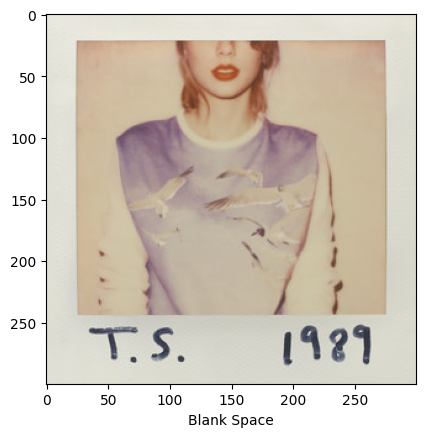

In [224]:
import matplotlib.pyplot as plt
from skimage import io

nome_musica = 'Taylor Swift - Blank Space'

id = projection_kmeans\
          .filter(projection_kmeans.artists_song == nome_musica)\
          .select('id').collect()[0][0]

track = sp.track(id)

url = track["album"]["images"][1]["url"]
name = track["name"]

image = io.imread(url)
plt.imshow(image)
plt.xlabel(name, fontsize = 10)
plt.show()


In [245]:
def recomendador(nome_musica):
 #Calcula musicas recomendadas
  cluster = projection_kmeans.filter(projection_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]
  musicas_recomendadas = projection_kmeans.filter(projection_kmeans.cluster_pca == cluster)\
                                       .select('artists_song', 'id', 'pca_features')
  componenetes_musica = musicas_recomendadas.filter(musicas_recomendadas.artists_song == nome_musica)\
                                          .select('pca_features').collect()[0][0]

  def calcula_distance(value):
    return euclidean(componenetes_musica, value)

  udf_calcula_distance = f.udf(calcula_distance, FloatType())

  musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calcula_distance('pca_features'))

  recomendadas = sessao_spark.createDataFrame(musicas_recomendadas_dist.sort('Dist').take(10)).select(['artists_song', 'id', 'Dist'])

  #Pegar informações da API

  playlist_id = recomendadas.select('id').collect()

  name = []
  url = []
  for i in playlist_id:
      track = sp.track(i[0])
      url.append(track["album"]["images"][1]["url"])
      name.append(track["name"])

  #Plotando capas

  plt.figure(figsize=(15, 10))

  columns = 5
  rows = len(url) // columns + (len(url) % columns > 0)

  for i, (u, track_name) in enumerate(zip(url, name), 1):
      plt.subplot(rows, columns, i)

      image = io.imread(u)
      plt.imshow(image)

      plt.title(track_name, fontsize=10)

      plt.axis('off')  # Desliga os eixos

  plt.tight_layout()
  plt.show()

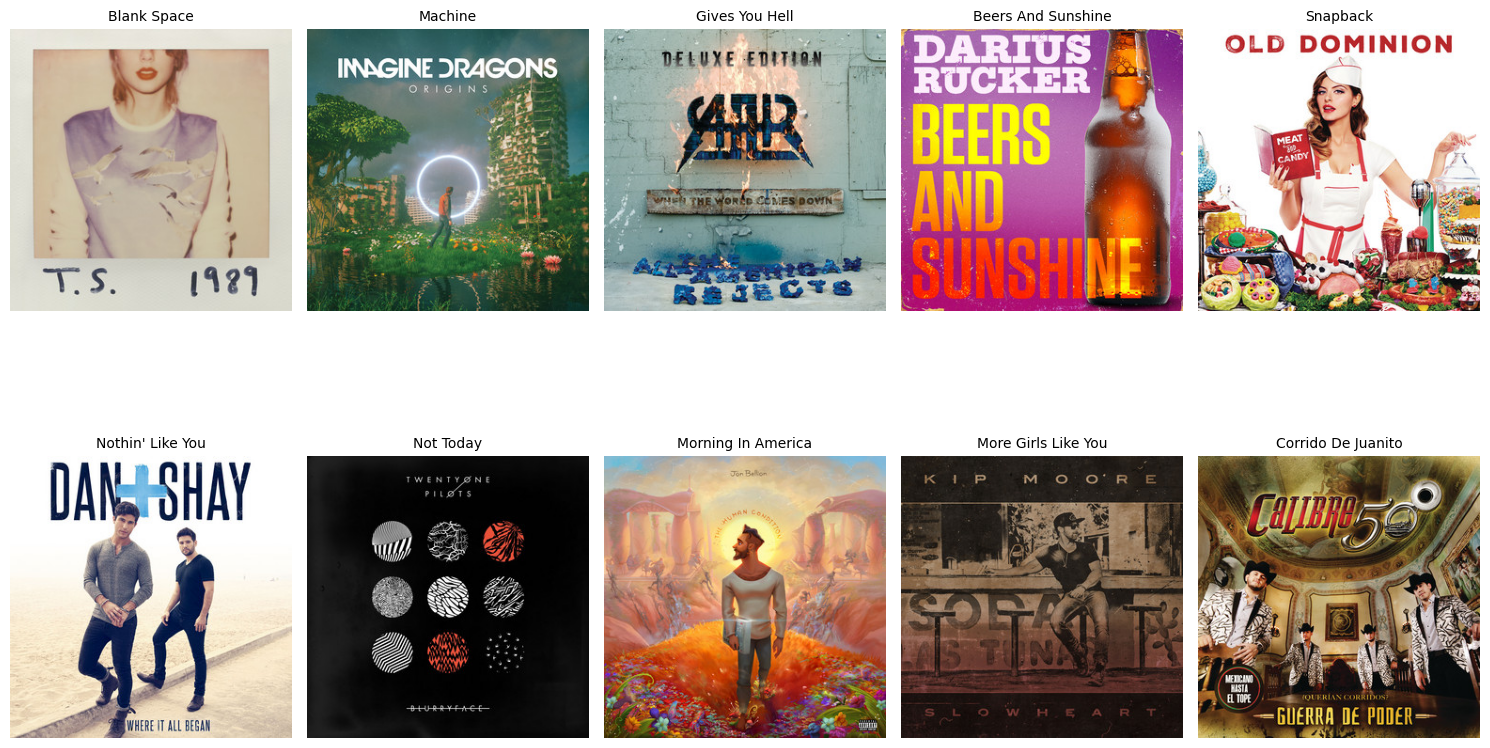

In [246]:
recomendador('Taylor Swift - Blank Space')
